In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import keras
from keras.models import *
from keras.layers import *
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras import backend as K
K.set_session(session)

/hdd/home/peter0749/virtualenv/tf_keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/hdd/home/peter0749/virtualenv/tf_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
DATASET_ROOT = '/hdd/dataset/tbrain/'
TRAIN_PATH = os.path.join(DATASET_ROOT, 'taetfp_utf8.csv')
TS_IN=30
TS_OUT=5
fields = ['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交張數(張)']

,代碼,日期,中文簡稱,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
0,50,20130102,元大台灣50,46.57,47.13,46.49,46.92,16487.0
11574,59,20130102,富邦金融,24.65,24.65,24.65,24.65,2.0
14146,6203,20130102,元大MSCI台灣,22.61,22.61,22.56,22.56,28.0
16718,6208,20130102,富邦台50,27.00,27.33,26.99,27.21,79.0
7716,56,20130102,元大高股息,18.45,18.63,18.45,18.55,1623.0
2572,52,20130102,富邦科技,27.45,27.85,27.45,27.81,26.0
15432,6204,20130102,永豐臺灣加權,33.61,33.95,33.53,33.86,1574.0
9002,57,20130102,富邦摩台,30.35,30.69,30.35,30.69,69.0
1286,51,20130102,元大中型100,22.36,22.66,22.36,22.65,277.0
10288,58,20130102,富邦發達,32.45,32.45,32.12,32.12,2.0


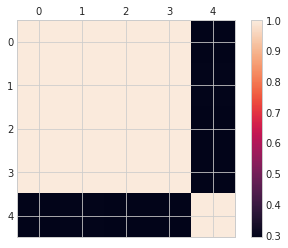

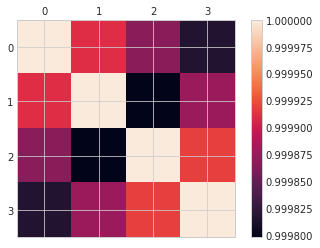

In [3]:
train_csv = pd.read_csv(TRAIN_PATH)
train_csv.sort_values(by=['日期'], ascending=True, inplace=True)
train_csv[fields] = train_csv[fields].applymap(lambda x: float(x.replace(',','')) if type(x)==str else x)
display(train_csv.head(n=10))
fig, ax = plt.subplots()
cax = ax.matshow(train_csv[fields].corr())
fig.colorbar(cax)
plt.show()
fig, ax = plt.subplots()
cax = ax.matshow(train_csv[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']].corr())
fig.colorbar(cax)
plt.show()

In [4]:
codes = list(sorted(set(train_csv['代碼'])))

Simple EDA on (code 50)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,61.779261,62.046011,61.500537,61.790910,9184.863142
std,10.592680,10.615132,10.577471,10.604766,7185.972839
min,45.970000,46.140000,45.670000,45.710000,809.000000
25%,53.462500,53.917500,53.177500,53.670000,4112.500000
50%,59.745000,60.010000,59.410000,59.730000,7120.000000
75%,67.980000,68.260000,67.740000,67.980000,11907.500000
max,85.840000,86.180000,85.690000,86.080000,61317.000000


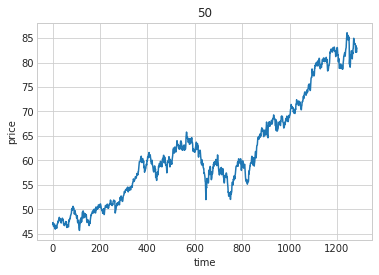

Simple EDA on (code 51)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,26.223670,26.337123,26.090762,26.199121,47.604977
std,2.585484,2.582579,2.587664,2.581360,76.324677
min,20.610000,21.170000,20.380000,20.380000,0.000000
25%,24.262500,24.315000,24.102500,24.172500,14.000000
50%,26.190000,26.290000,26.040000,26.165000,27.000000
75%,27.577500,27.680000,27.490000,27.560000,49.750000
max,33.000000,33.000000,32.720000,32.860000,1061.000000


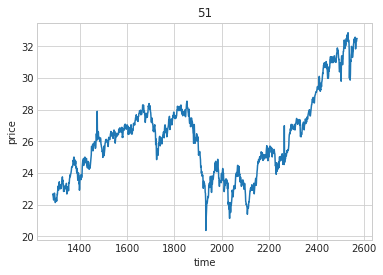

Simple EDA on (code 52)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,38.125778,38.248608,37.977426,38.100218,13.969673
std,8.223970,8.244539,8.191069,8.219781,30.405608
min,26.830000,26.840000,26.830000,26.840000,0.000000
25%,31.827500,32.130000,31.627500,31.905000,2.000000
50%,36.500000,36.710000,36.320000,36.430000,5.000000
75%,42.132500,42.245000,41.997500,42.077500,13.000000
max,59.800000,60.000000,58.750000,59.450000,394.000000


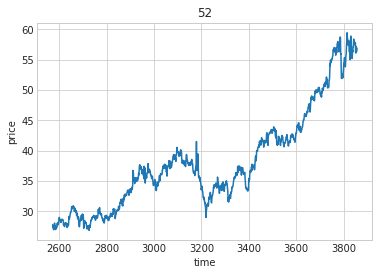

Simple EDA on (code 53)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,26.567076,26.666159,26.452659,26.556330,38.953344
std,5.068046,5.059434,5.062327,5.051276,102.699422
min,19.140000,19.270000,18.140000,19.130000,0.000000
25%,22.960000,23.040000,22.842500,22.897500,8.000000
50%,25.760000,25.820000,25.590000,25.685000,18.000000
75%,29.082500,29.165000,28.990000,29.100000,42.000000
max,38.030000,38.030000,37.840000,37.860000,2866.000000


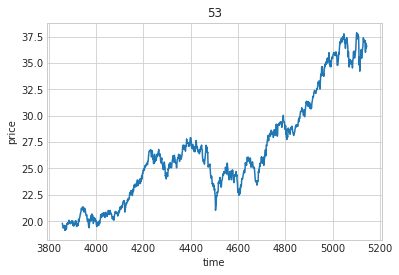

Simple EDA on (code 54)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,20.388367,20.460490,20.306073,20.386960,25.257387
std,2.339198,2.330208,2.353022,2.333346,43.073964
min,16.030000,16.140000,15.920000,16.100000,0.000000
25%,18.770000,18.820000,18.665000,18.760000,5.000000
50%,20.290000,20.370000,20.205000,20.295000,12.000000
75%,21.767500,21.800000,21.695000,21.765000,29.000000
max,25.490000,25.540000,25.420000,25.490000,568.000000


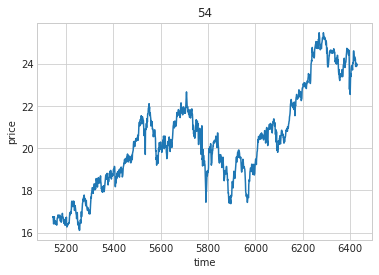

Simple EDA on (code 55)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,13.185801,13.248546,13.124736,13.186275,795.345257
std,1.659359,1.661332,1.655853,1.655907,1296.079810
min,9.820000,9.870000,9.760000,9.800000,2.000000
25%,11.902500,11.962500,11.862500,11.910000,126.000000
50%,13.100000,13.160000,13.030000,13.100000,382.500000
75%,14.440000,14.470000,14.380000,14.427500,946.000000
max,17.200000,17.220000,17.150000,17.160000,15113.000000


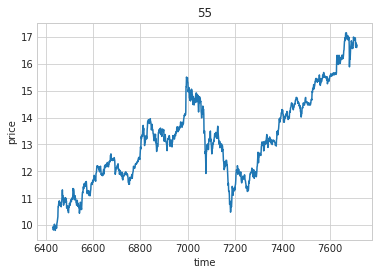

Simple EDA on (code 56)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,21.340607,21.414339,21.250241,21.338569,1926.804821
std,2.215301,2.219003,2.225709,2.223066,2073.781656
min,17.130000,17.200000,16.400000,17.050000,123.000000
25%,19.480000,19.550000,19.390000,19.482500,687.250000
50%,20.790000,20.875000,20.695000,20.790000,1252.000000
75%,22.630000,22.715000,22.565000,22.650000,2429.750000
max,26.760000,26.800000,26.570000,26.800000,18605.000000


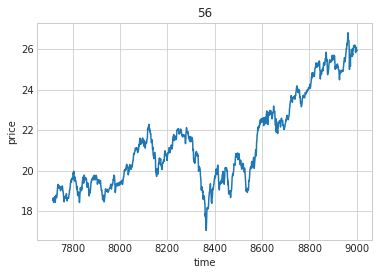

Simple EDA on (code 57)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,39.313453,39.397512,39.219837,39.306757,60.682737
std,5.787822,5.767016,5.792347,5.774989,142.277721
min,29.930000,29.960000,29.930000,29.960000,0.000000
25%,34.675000,34.742500,34.590000,34.655000,3.000000
50%,38.455000,38.570000,38.305000,38.410000,10.000000
75%,42.457500,42.475000,42.385000,42.427500,55.000000
max,52.900000,52.900000,52.900000,52.900000,1893.000000


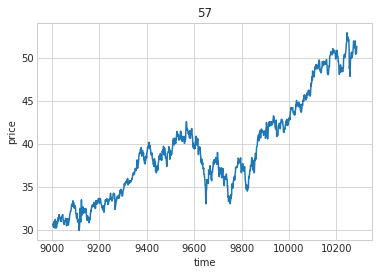

Simple EDA on (code 58)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,38.423577,38.467006,38.374961,38.418709,7.428460
std,4.538253,4.535792,4.537148,4.531849,20.726398
min,30.630000,30.750000,30.630000,30.750000,0.000000
25%,35.032500,35.082500,34.960000,35.040000,0.000000
50%,37.705000,37.735000,37.640000,37.710000,2.000000
75%,40.255000,40.320000,40.240000,40.290000,5.000000
max,48.730000,48.900000,48.730000,48.800000,426.000000


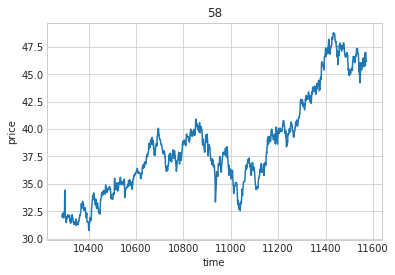

Simple EDA on (code 59)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,32.621625,32.712675,32.523134,32.608445,13.659409
std,3.896990,3.923225,3.866078,3.879640,33.575269
min,24.360000,24.400000,24.360000,24.360000,0.000000
25%,29.720000,29.750000,29.682500,29.710000,2.000000
50%,32.550000,32.640000,32.485000,32.530000,4.000000
75%,35.090000,35.167500,34.980000,35.077500,12.000000
max,42.500000,42.500000,42.390000,42.500000,504.000000


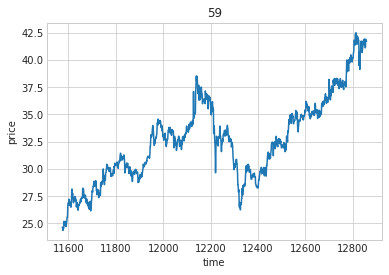

Simple EDA on (code 690)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,20.727621,20.782419,20.660524,20.723347,723.141129
std,0.945578,0.954296,0.929114,0.938850,386.418990
min,18.720000,18.800000,18.710000,18.780000,20.000000
25%,20.130000,20.187500,20.055000,20.137500,573.750000
50%,20.790000,20.830000,20.730000,20.770000,687.000000
75%,21.190000,21.260000,21.160000,21.212500,874.250000
max,22.520000,22.540000,22.400000,22.480000,2891.000000


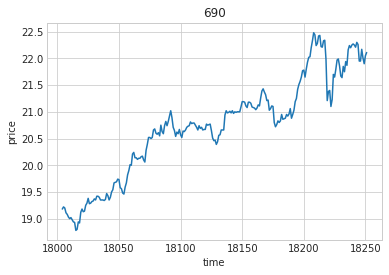

Simple EDA on (code 692)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,218.000000,218.000000,218.000000,218.000000,218.000000
mean,20.591514,20.652661,20.522844,20.596376,1419.949541
std,0.822839,0.827349,0.801771,0.814930,1269.404578
min,18.750000,18.810000,18.660000,18.780000,411.000000
25%,20.170000,20.220000,20.112500,20.160000,940.000000
50%,20.595000,20.620000,20.485000,20.580000,1093.500000
75%,21.162500,21.222500,21.022500,21.097500,1472.000000
max,22.200000,22.290000,22.150000,22.250000,14039.000000


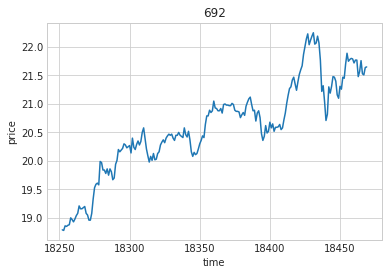

Simple EDA on (code 701)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,20.451503,20.505817,20.373725,20.437647,582.052288
std,0.520279,0.525631,0.488366,0.498441,1531.540026
min,19.700000,19.720000,19.630000,19.670000,4.000000
25%,20.040000,20.100000,19.990000,20.050000,73.000000
50%,20.280000,20.310000,20.190000,20.230000,180.000000
75%,20.880000,20.940000,20.830000,20.880000,478.000000
max,21.800000,21.800000,21.480000,21.500000,13660.000000


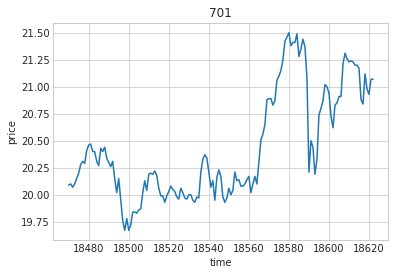

Simple EDA on (code 713)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,30.573306,30.652984,30.460806,30.554032,656.620968
std,0.402120,0.371488,0.407171,0.375506,1200.780990
min,29.230000,29.900000,29.230000,29.790000,2.000000
25%,30.320000,30.450000,30.160000,30.295000,37.750000
50%,30.620000,30.685000,30.530000,30.605000,111.000000
75%,30.822500,30.912500,30.700000,30.797500,530.500000
max,31.500000,31.500000,31.270000,31.300000,5432.000000


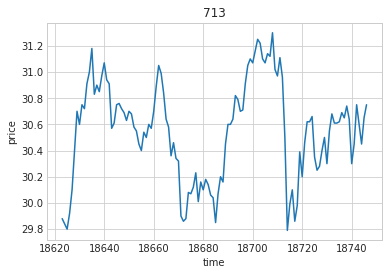

Simple EDA on (code 6201)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,11.427613,11.489082,11.353904,11.416120,75.196734
std,1.310100,1.314899,1.304840,1.306774,116.640447
min,8.690000,9.070000,8.630000,8.640000,0.000000
25%,10.580000,10.652500,10.520000,10.570000,23.000000
50%,11.090000,11.150000,11.020000,11.065000,46.000000
75%,12.010000,12.070000,11.940000,12.000000,88.000000
max,16.220000,16.220000,15.040000,15.150000,1602.000000


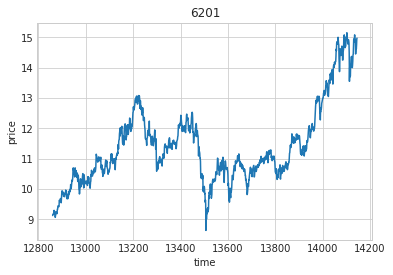

Simple EDA on (code 6203)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,29.383616,29.446267,29.321096,29.387185,246.177294
std,4.531016,4.517634,4.539369,4.525523,8089.907437
min,22.300000,22.300000,22.300000,22.300000,0.000000
25%,25.827500,26.077500,25.657500,25.822500,1.000000
50%,28.670000,28.770000,28.530000,28.645000,3.000000
75%,31.770000,31.795000,31.770000,31.780000,16.000000
max,40.200000,40.200000,40.030000,40.030000,290124.000000


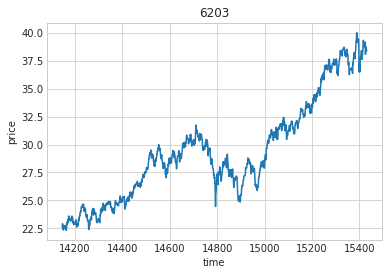

Simple EDA on (code 6204)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,42.204759,42.281446,42.115117,42.200902,196.508554
std,5.673847,5.640188,5.712676,5.674905,523.905098
min,33.320000,33.430000,33.000000,33.050000,0.000000
25%,37.990000,38.070000,37.865000,37.972500,2.000000
50%,41.010000,41.090000,40.880000,40.985000,9.000000
75%,44.580000,44.622500,44.535000,44.590000,161.250000
max,55.700000,55.750000,55.700000,55.700000,7868.000000


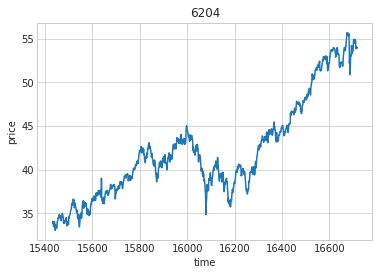

Simple EDA on (code 6208)


,開盤價(元),最高價(元),最低價(元),收盤價(元),成交張數(張)
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,35.657659,35.739487,35.560062,35.632403,15.749611
std,6.194429,6.208437,6.195761,6.203303,34.213468
min,26.720000,26.790000,26.560000,26.580000,0.000000
25%,30.850000,30.902500,30.732500,30.812500,1.000000
50%,34.430000,34.480000,34.315000,34.400000,4.000000
75%,38.750000,38.810000,38.747500,38.750000,15.000000
max,50.250000,51.120000,49.770000,51.120000,617.000000


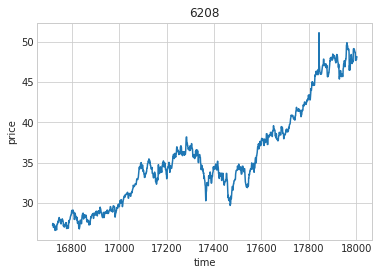

In [5]:
split_train = []
for code in codes:
    row = train_csv.loc[train_csv['代碼']==code][fields]
    print('Simple EDA on (code {:d})'.format(code))
    display(row.describe())
    fit, ax = plt.subplots()
    ax.set_title(str(code))
    ax.set_xlabel('time')
    ax.set_ylabel('price')
    ax.plot(row['收盤價(元)'])
    plt.show()
    split_train.append(np.array(row))

In [6]:
for n, s in enumerate(split_train):
    print(codes[n], len(s))

50 1286
51 1286
52 1286
53 1286
54 1286
55 1286
56 1286
57 1286
58 1286
59 1286
690 248
692 218
701 153
713 124
6201 1286
6203 1286
6204 1286
6208 1286


In [7]:
from keras.regularizers import *

# custom R2-score metrics for keras backend
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def make_model(ts_in=60, ts_out=5, n_field=5, n_encode=128, n_decode=128, reg_a=0.1):
    input_ = Input(shape=(ts_in, n_field))
    lstm_1 = CuDNNLSTM(n_encode, return_sequences=False, recurrent_regularizer=l2(reg_a)) (input_)
    rep_vec_2 = RepeatVector(ts_out) (lstm_1)
    lstm_3 = CuDNNLSTM(n_decode, return_sequences=True, recurrent_regularizer=l2(reg_a)) (rep_vec_2)
    lstm_4 = CuDNNLSTM(n_decode, return_sequences=True, recurrent_regularizer=l2(reg_a)) (lstm_3)
    fc_4 = TimeDistributed(Dense(1, kernel_regularizer=l2(reg_a))) (lstm_4)
    return Model([input_], [fc_4])
make_model(ts_in=TS_IN, ts_out=TS_OUT).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 5)             0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               69120     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 128)            0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 5, 128)            132096    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 5, 128)            132096    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              129       
Total params: 333,441
Trainable params: 333,441
Non-trainable params: 0
_________________________________________________________________


In [8]:
def make_seq(seq, ts_in=60, ts_out=5):
    Xs = []
    Ys = []
    total_l = ts_in + ts_out
    for i in range(0, len(seq)-total_l+1):
        Xs.append(seq[i:i+ts_in])
        Ys.append(seq[i+ts_in:i+total_l, 3:4])
    return np.array(Xs), np.array(Ys)

In [9]:
train_18 = []
for seq in split_train:
    Xs, Ys = make_seq(seq, ts_in=TS_IN, ts_out=TS_OUT)
    train_18.append([Xs, Ys])

In [10]:
from matplotlib.figure import figaspect
def vis(history, title='no title', dpi=80):
    fig, ax = plt.subplots(1, 3, dpi=80, figsize=(20, 5))
    ax[0].set_title(title+' loss plot')
    ax[1].set_title(title+' loss plot (zoom)')
    ax[2].set_title(title+' r2 plot')
    ax[0].set_xlabel('epoch')
    ax[1].set_xlabel('epoch')
    ax[2].set_xlabel('epoch')
    ax[0].set_ylabel('mse')
    ax[1].set_ylabel('mse')
    ax[2].set_ylabel('r2')
    ax[0].set_ylim(0, 180)
    ax[1].set_ylim(0, 20)
    ax[2].set_ylim(-2, 1)
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].legend(['train','valid'], loc='upper right')
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].legend(['train','valid'], loc='upper right')
    ax[2].plot(history.history['r2_keras'])
    ax[2].plot(history.history['val_r2_keras'])
    ax[2].legend(['train','valid'], loc='lower right')
    plt.tight_layout()
    plt.show()

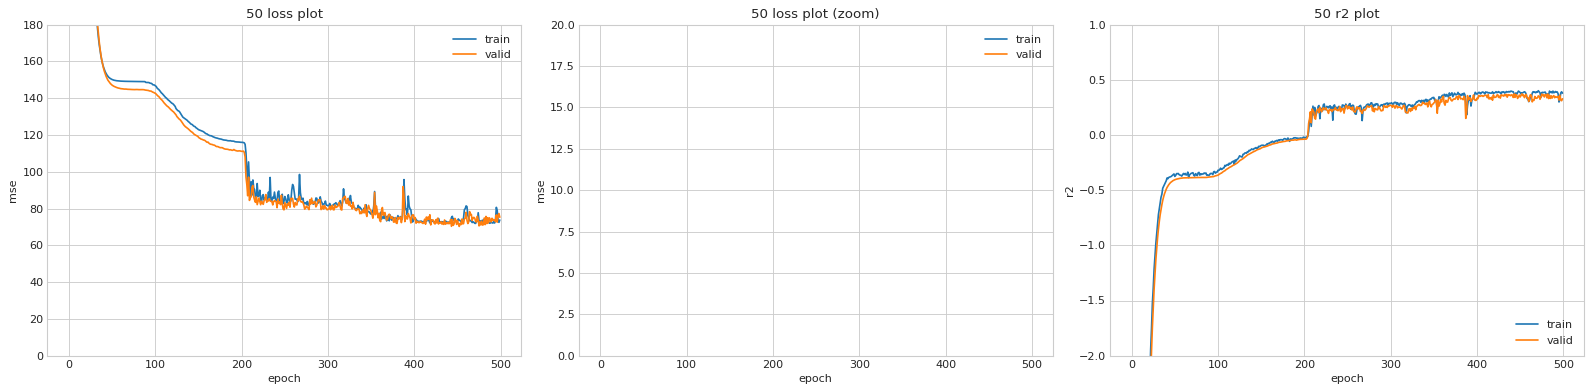

validation loss: 75.255685
validation r2: 0.328192


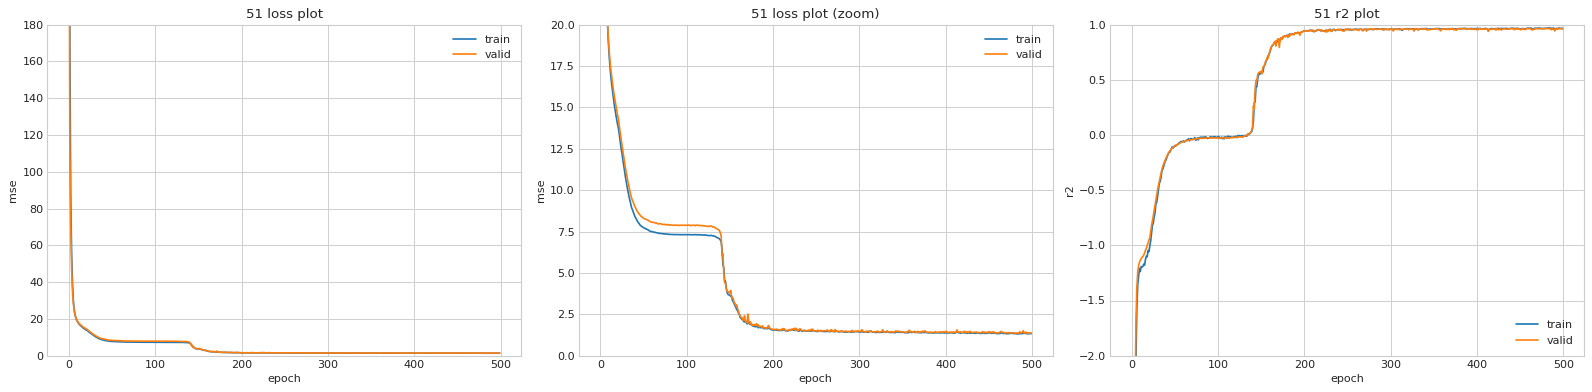

validation loss: 1.387724
validation r2: 0.960977


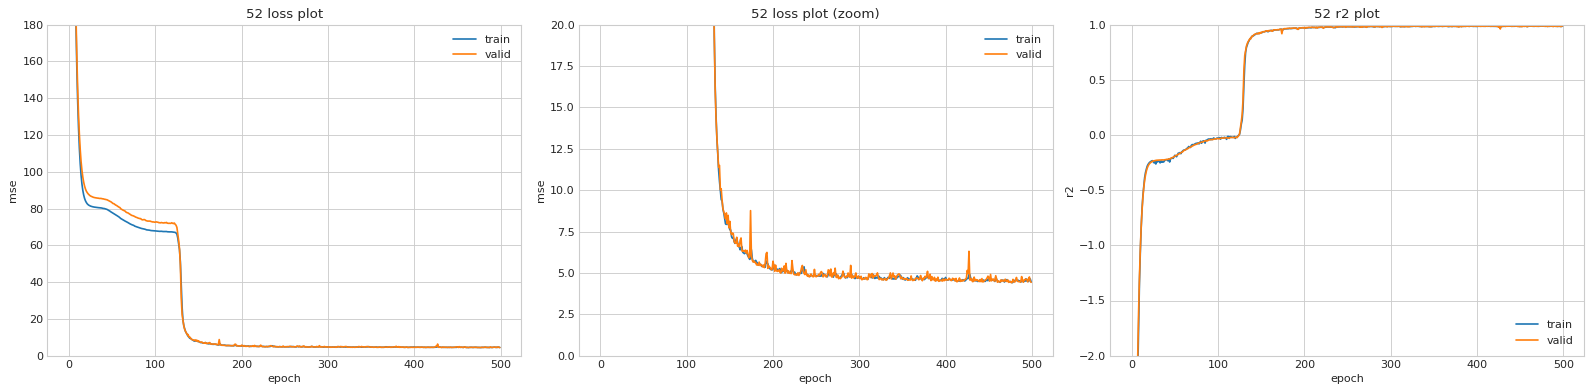

validation loss: 4.432606
validation r2: 0.987874


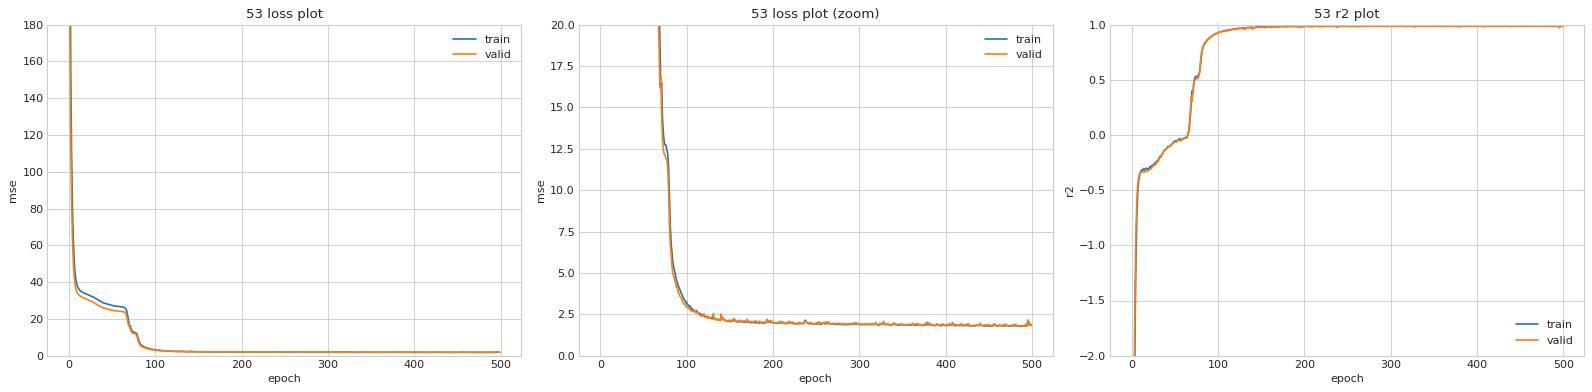

validation loss: 1.903717
validation r2: 0.985014


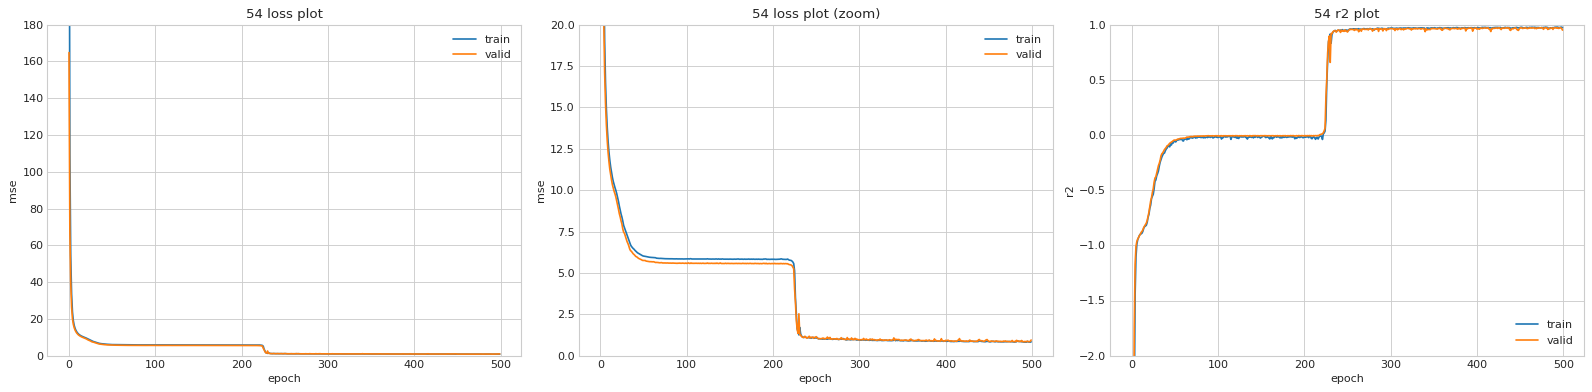

validation loss: 0.945084
validation r2: 0.950838


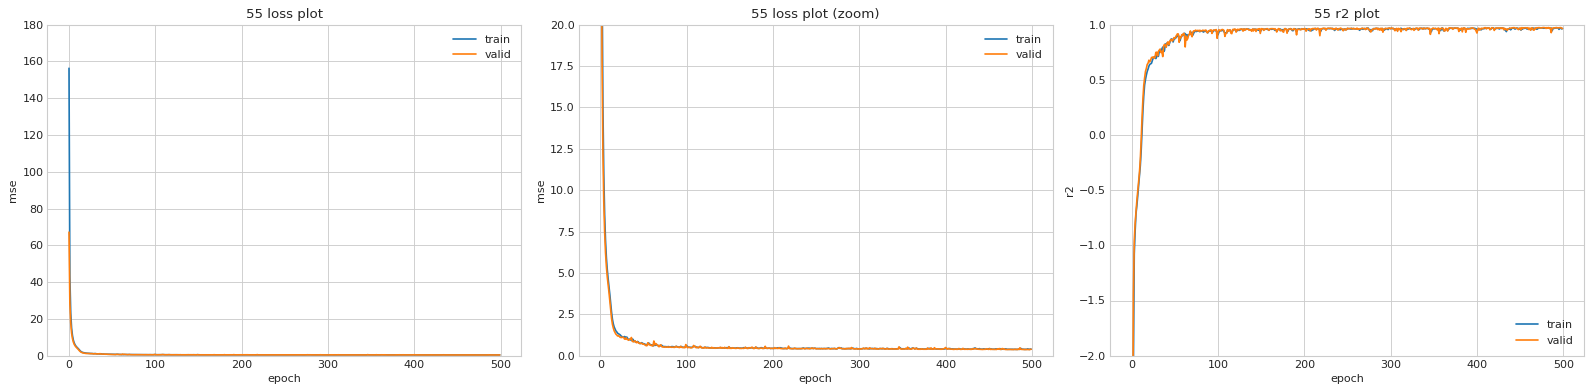

validation loss: 0.389645
validation r2: 0.964846


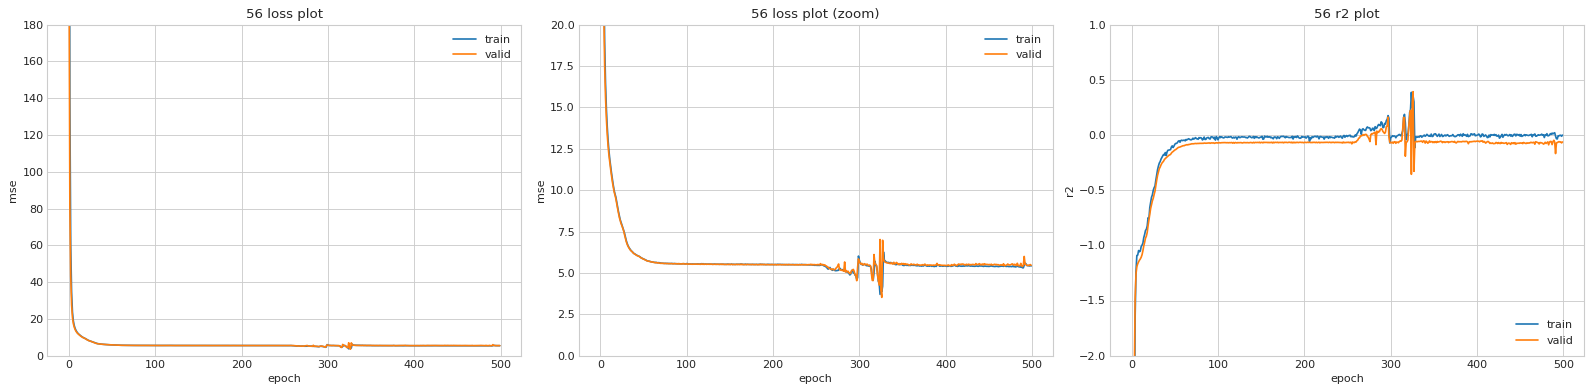

validation loss: 5.460253
validation r2: -0.063073


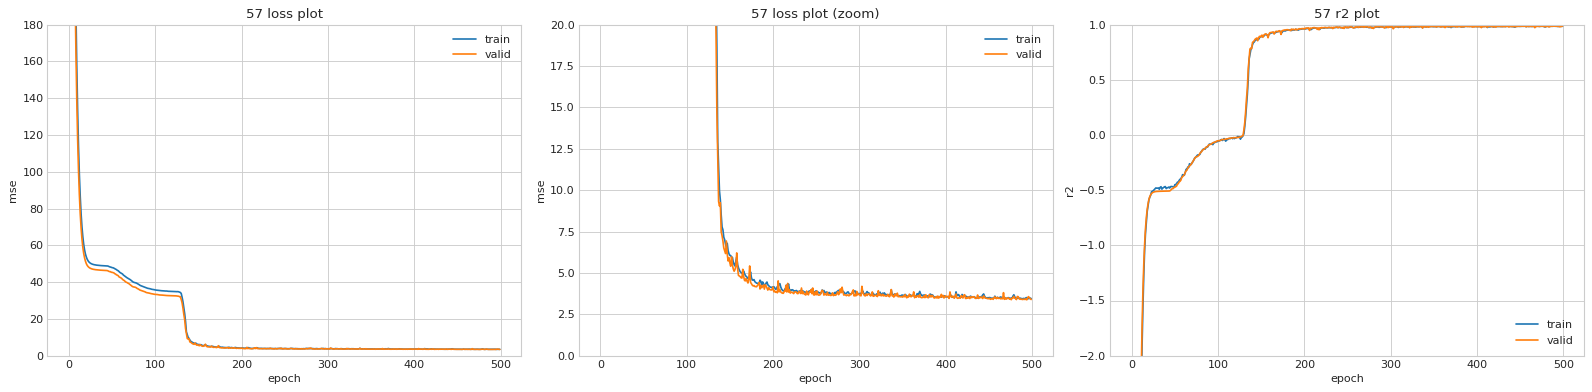

validation loss: 3.393881
validation r2: 0.986389


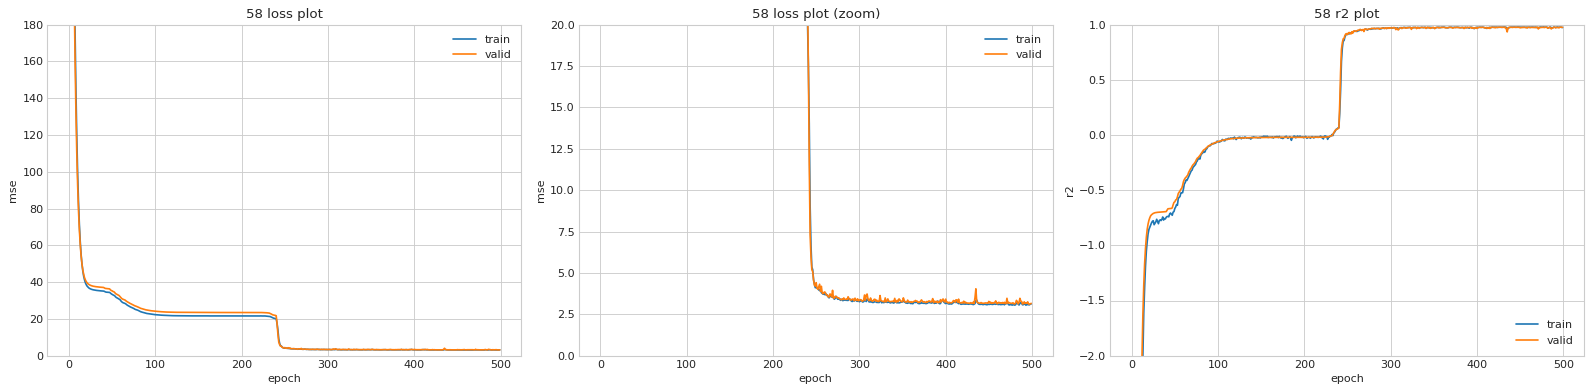

validation loss: 3.162475
validation r2: 0.975194


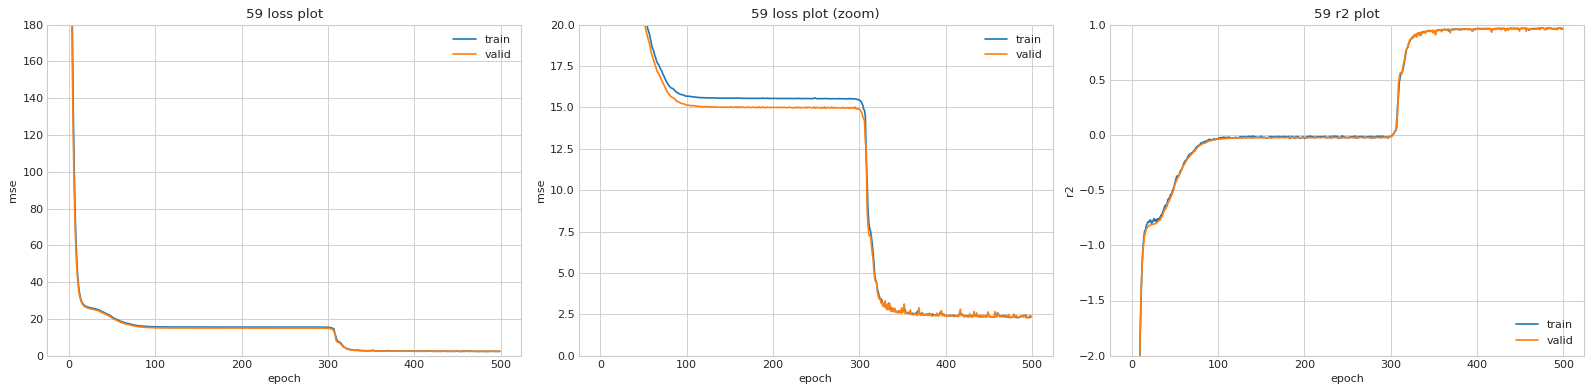

validation loss: 2.370524
validation r2: 0.962105


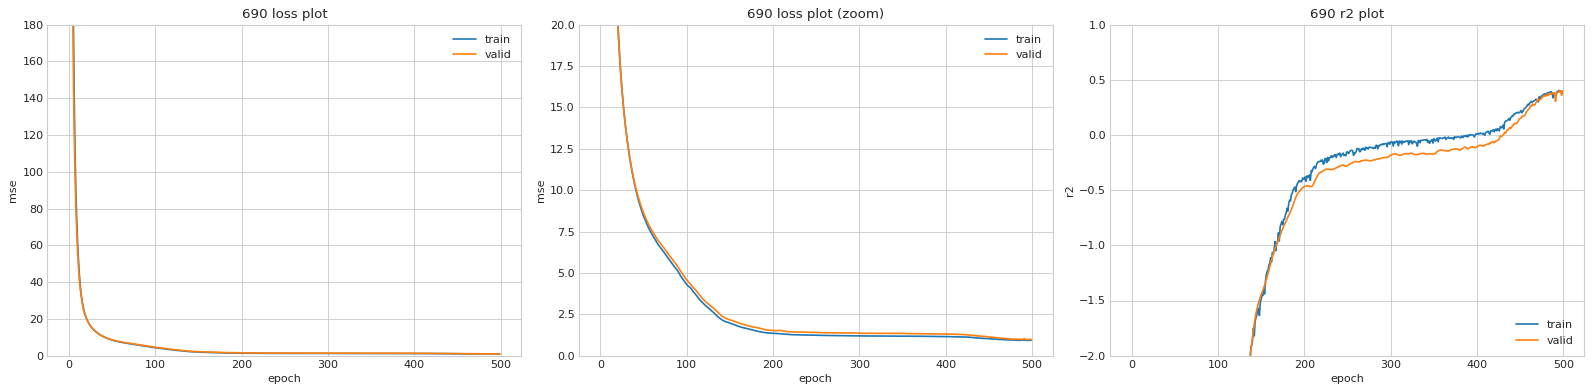

validation loss: 0.971180
validation r2: 0.402071


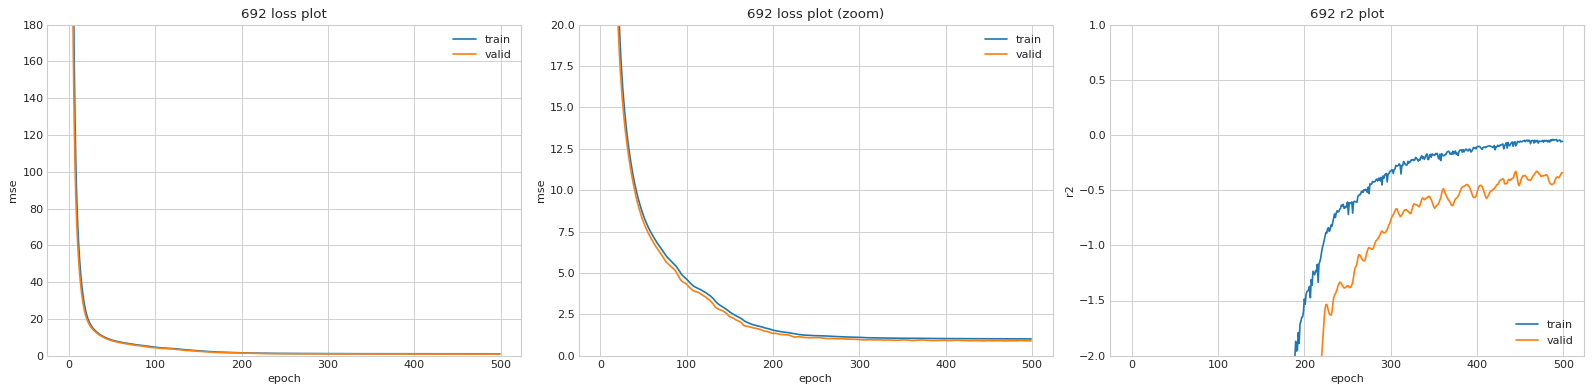

validation loss: 0.890481
validation r2: -0.342216


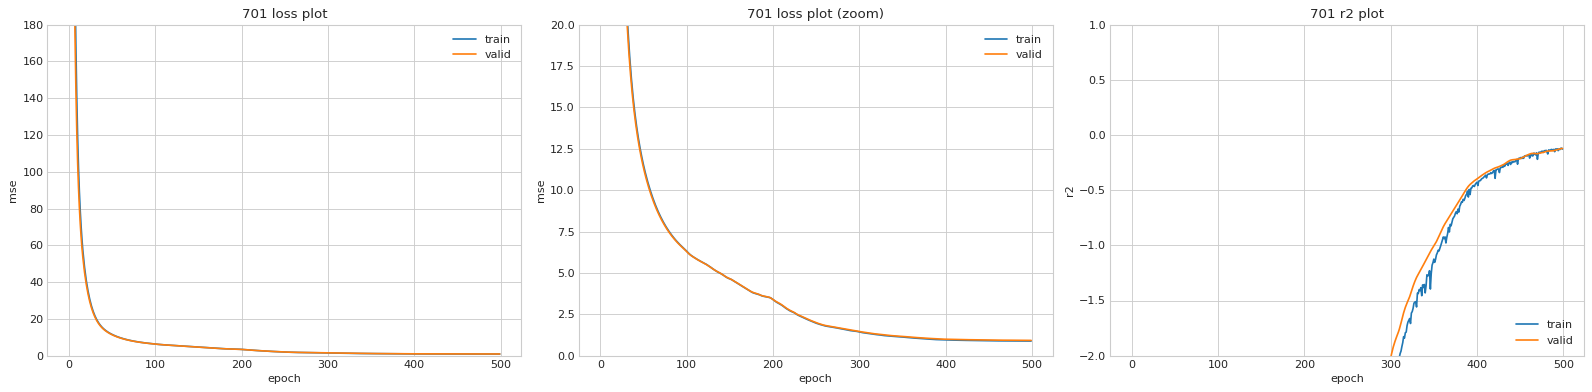

validation loss: 0.922828
validation r2: -0.121665


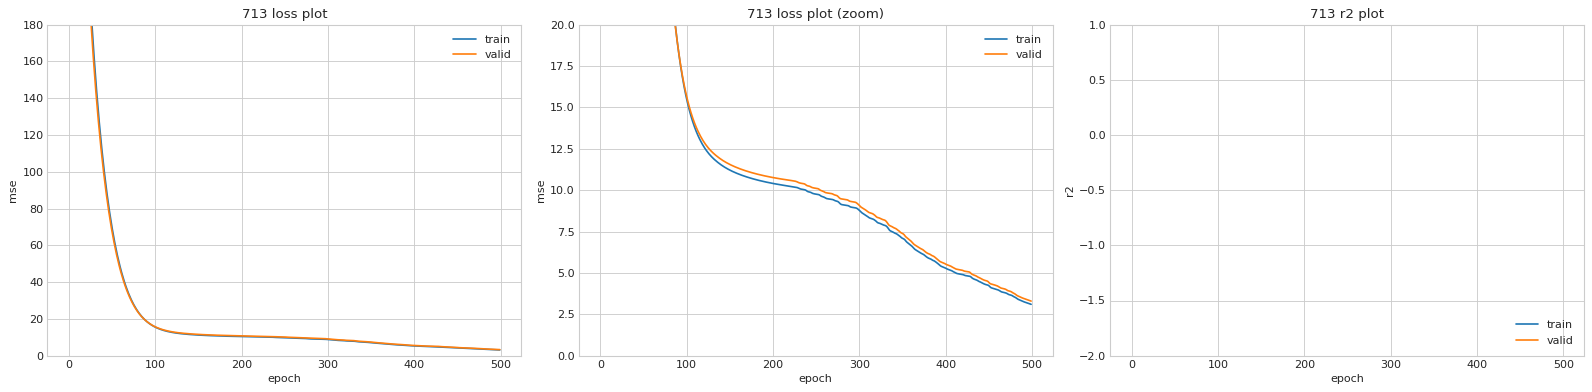

validation loss: 3.297173
validation r2: -9.612100


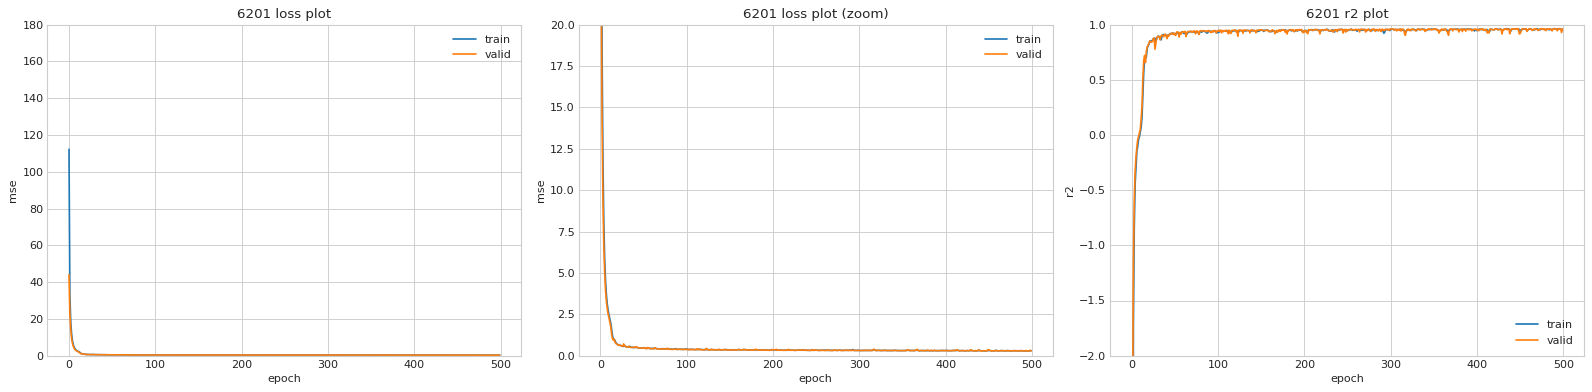

validation loss: 0.283135
validation r2: 0.961835


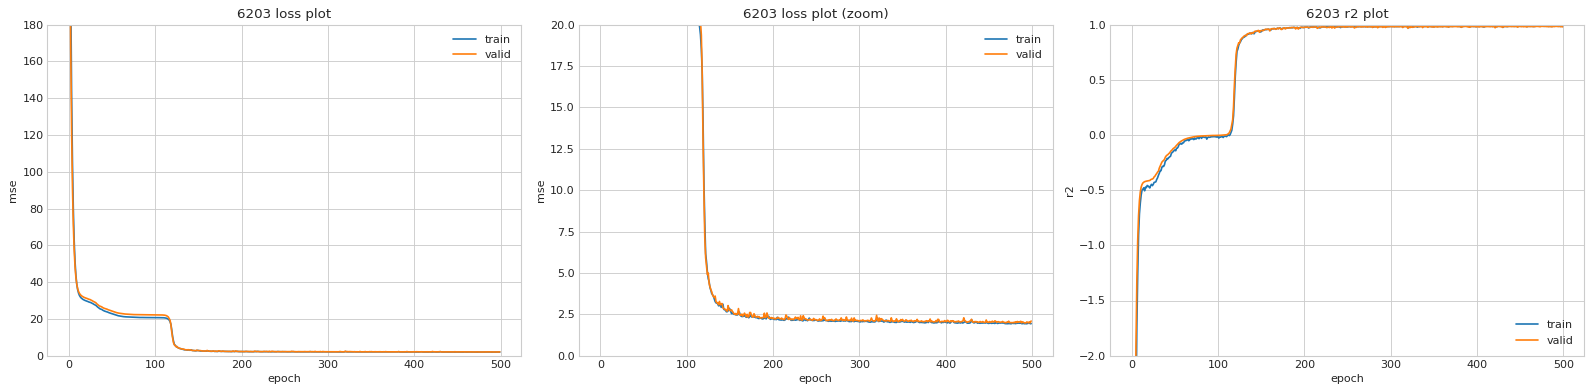

validation loss: 2.093064
validation r2: 0.979796


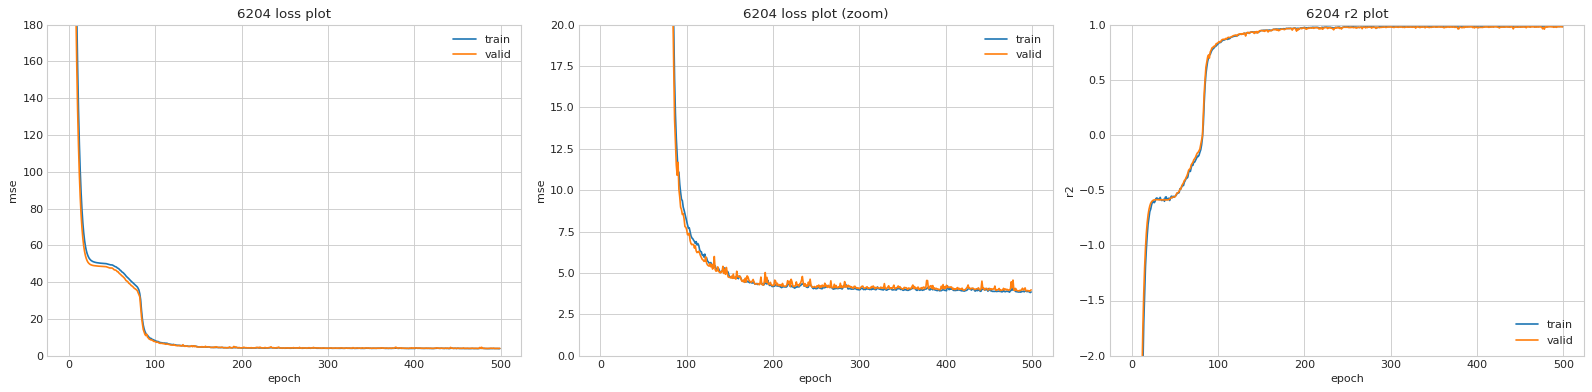

validation loss: 3.975330
validation r2: 0.979249


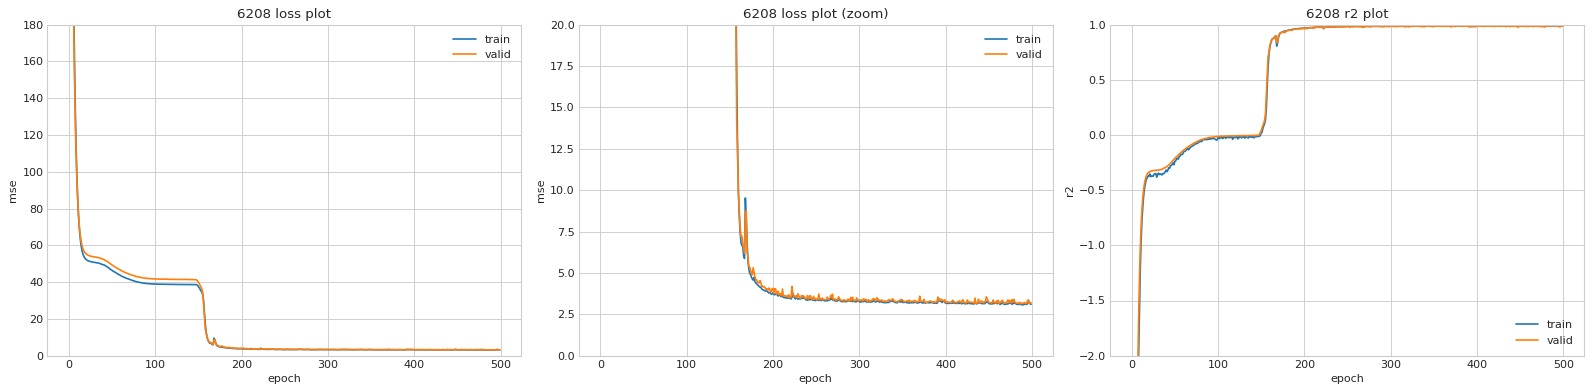

validation loss: 3.188256
validation r2: 0.986503


In [11]:
from keras.callbacks import *
from sklearn.model_selection import train_test_split
BATCH_SIZE = 64
EPOCH = 500
for model_n, (X, Y) in enumerate(train_18):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    prefix = str(codes[model_n])
    model = make_model(ts_in=TS_IN, ts_out=TS_OUT)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2_keras])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , batch_size=BATCH_SIZE, epochs=EPOCH, callbacks=[TensorBoard(log_dir=prefix+'_logs')], shuffle=True, verbose=0)
    vis(history, title=prefix, dpi=180)
    print('validation loss: {:.6f}\nvalidation r2: {:.6f}'.format(history.history['val_loss'][-1], history.history['val_r2_keras'][-1]))
    model.save(prefix+'_model.h5')
    K.clear_session()

![](https://tbrain.trendmicro.com.tw/Content/img/18etf.png)

#### Todo:
1. Check missing data / value
2. Do more EDA on dataset
3. Try more baseline models (LSTM, GRU, CNN-1D, XGBoost, SVM, ...) 
4. Add Candlestick chart
5. Add n-fold cross validation
